# Assignment 1
#### Yu Nakamura

## 1. Spam detection

- In this exercise, we use Bayes and na&iuml;ve Bayes classifiers to classify text message spam.

- We use a dataset from the UCI machine learning repository. Details can be found here [here](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

- For our convenience, I'm hosting the data file on my github page.

In [179]:
import pandas as pd

url = "https://raw.githubusercontent.com/mgreenbe/spam/main/spam.csv"
df = pd.read_csv(url, encoding="latin-1")
df.rename(columns={"v1": "label", "v2": "message"}, inplace=True)
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Split the data into a training set (80% of the data) and a testing set (20% of the data).

Compute the proportions of ham and spam in the training set.

a. Add a feature column **length** to the dataframe `df` containing the lengths of the messages, in characters. Classify the messages in the test set as ham/spam using a Gaussian (na&iuml;) Bayes classifier trained on the length data. Record the associated testing error.

Repeat this exercise with **caps**, the number of capital letters in a message, and **misc**, the number of characters in a message that aren't letters, digits, or spaces.

(Since each of the classifiers in this part only considers a single feature, there is no distinction between Bayes and na&iuml;ve Bayes.)

b. Construct a **Gaussian na&iuml;ve Bayes** classifier to the (**length**, **caps**, **misc**) data. Compare its performance to those considered in part (a).

c. Construct a **Gaussian Bayes** classifier by fitting a 3-dimensional Gaussian distribution to the (**length**, **caps**, **misc**) data. Compare its performance to the na&iuml;ve version considered in part (b). Comment.

d. Repeat part (a) with **digits**, the number of digits in a message, and **misc**, the number of characters in a message that aren't letters, digits, or spaces. Comment.

e. Construct a **multinomial na&iuml;ve Bayes** classifier using frequency data as produced by `CountVectorizer`. Compare its performance to those considered above.

Here are the features that added to `df` further analysis.

In [180]:
# Add features columns
df['length']=df['message'].str.len()
df['caps']=df['message'].str.findall(r'[A-Z]').str.len()
df['digits']=df['message'].str.count('\d') # the number of digits
df['spaces']=df['message'].str.count(' ') # the number of space
df['alphabets']=df.apply(lambda p: sum(q.isalpha() for q in p["message"] ), axis=1) # the number of alphabets
df['misc']=df['length']-df['alphabets']-df['spaces']-df['digits'] # the number of characters in a message that aren't letters, digits, or spaces
df.head()

,label,message,length,caps,digits,spaces,alphabets,misc
0,ham,"Go until jurong point, crazy.. Available only ...",111,3,0,19,83,9
1,ham,Ok lar... Joking wif u oni...,29,2,0,5,18,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,10,25,27,97,6
3,ham,U dun say so early hor... U c already then say...,49,2,0,10,33,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0,12,47,2


Create a new column for categorical values: 'ham' == 0, 'spam' == 1 for the further analysis 

In [181]:
def label_to_numeric(x):
    if x=='ham': return 0
    if x=='spam': return 1

df['label_num']=df['label'].apply(label_to_numeric)
df.head()

,label,message,length,caps,digits,spaces,alphabets,misc,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,3,0,19,83,9,0
1,ham,Ok lar... Joking wif u oni...,29,2,0,5,18,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,10,25,27,97,6,1
3,ham,U dun say so early hor... U c already then say...,49,2,0,10,33,6,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0,12,47,2,0


a. Add a feature column **length** to the dataframe `df` containing the lengths of the messages, in characters. Classify the messages in the test set as ham/spam using a Gaussian (na&iuml;) Bayes classifier trained on the length data. Record the associated testing error.

Repeat this exercise with **caps**, the number of capital letters in a message, and **misc**, the number of characters in a message that aren't letters, digits, or spaces.

(Since each of the classifiers in this part only considers a single feature, there is no distinction between Bayes and na&iuml;ve Bayes.)

In [182]:
from sklearn.naive_bayes import GaussianNB # To model the Gaussian Navie Bayes classifier
from sklearn.metrics import accuracy_score # To calculate the accuracy score of the model
from sklearn.model_selection import train_test_split
import random

In [183]:
random.seed(10)

X_tr, X_te, y_tr, y_te = train_test_split(df[['length']], df[['label_num']], test_size=0.2)

clf = GaussianNB()
clf.fit(X_tr, y_tr.values.ravel())
y_pred = clf.predict(X_te)

acc = accuracy_score(y_te, y_pred)
print(f"testing accuracy with feature length = {acc}")

testing accuracy with feature length = 0.863677130044843


In [184]:
random.seed(10)

X_tr, X_te, y_tr, y_te = train_test_split(df[['caps']], df[['label_num']], test_size=0.2)

clf = GaussianNB()
clf.fit(X_tr, y_tr.values.ravel())
y_pred = clf.predict(X_te)

acc = accuracy_score(y_te, y_pred)
print(f"testing accuracy with feature caps = {acc}")

testing accuracy with feature caps = 0.852017937219731


In [185]:
random.seed(10)

X_tr, X_te, y_tr, y_te = train_test_split(df[['misc']], df[['label_num']], test_size=0.2)

clf = GaussianNB()
clf.fit(X_tr, y_tr.values.ravel())
y_pred = clf.predict(X_te)

acc = accuracy_score(y_te, y_pred)
print(f"testing accuracy with feature misc = {acc}")

testing accuracy with feature misc = 0.8717488789237668


b. Construct a **Gaussian na&iuml;ve Bayes** classifier to the (**length**, **caps**, **misc**) data. Compare its performance to those considered in part (a).

In [186]:
X = df[['length', 'caps', 'misc']]
y = df[['label_num']]

In [187]:
random.seed(10)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

clf = GaussianNB()
clf.fit(X_tr, y_tr.values.ravel())
y_pred = clf.predict(X_te)

acc = accuracy_score(y_te, y_pred)
print(f"testing accuracy with feature length, caps and misc = {acc}")

testing accuracy with feature length, caps and misc = 0.9183856502242153


Compared to the result from part (a), the test accurancy is improving when using multiple features to classify the spam or not. 

c. Construct a **Gaussian Bayes** classifier by fitting a 3-dimensional Gaussian distribution to the (**length**, **caps**, **misc**) data. Compare its performance to the na&iuml;ve version considered in part (b). Comment.

In [188]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

norm = multivariate_normal.pdf

np.random.seed(10) # important for repeatability

data = df.to_numpy() # convert df (panda dataframe) to numpy array for the implemetion of below code
y = data[:,8].astype(int) 
X = data[:,[2,3, 7]].astype(float) # features (length, caps, misc)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

# fit the model (training data)
mean0 = np.mean(X_tr[y_tr == 0, :], axis=0)
mean1 = np.mean(X_tr[y_tr == 1, :], axis=0)
cov0 = np.cov(X_tr[y_tr == 0,:].T)
cov1 = np.cov(X_tr[y_tr == 1,:].T)
pY0 = 1 - np.mean(y_tr) # probability of class 0
pY1 = np.mean(y_tr) # probability of class 1

# prediction (testing data)
pXxY0 = norm(X_te, mean=mean0, cov=cov0, allow_singular=True)
pXxY1 = norm(X_te, mean=mean1, cov=cov1, allow_singular=True)
pY1Xx = pXxY1*pY1/(pXxY0*pY0 + pXxY1*pY1)

acc = np.mean(1*(pY1Xx > 0.5) == y_te)
print(f"testing accuracy = {acc}")

testing accuracy = 0.8959641255605382


Compared to the Naive Bayes classifer model from part (b) ~ 0.918, the testing accuracy from Bayes classifer is slighthly low ~ 0.896. When assume the three feature (length, caps and misc) are independent (Naive Bayes), we could get the better fit classification model. 

FYI To check an independent assumption for features variables, here are codes for correlation matrix and VIF test:
- From the matrix table below, an correlation between three features are relatively not higher., range from 0.27 to 0.66.
- The result of VIF test shows that there is no evidence of high multicollinearity between the features. (VIF = 1: no correlation, VIF >=5: high multicollinearity between the independent variables and the others exists)

Since there is no strong evidence of multicollinearity that three features are dependent, we could suggest the Naive Bayes classifer is better fit to use for the classification of spam email.

In [189]:
features = df[['length', 'caps', 'misc']]
corrMatrix = features.corr()
print(corrMatrix)

          length      caps      misc
length  1.000000  0.386437  0.645702
caps    0.386437  1.000000  0.266569
misc    0.645702  0.266569  1.000000


In [190]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(features)

,variables,VIF
0,length,3.563285
1,caps,1.462936
2,misc,3.148458


d. Repeat part (a) with **digits**, the number of digits in a message. Comment.

In [191]:
random.seed(10)

X_tr, X_te, y_tr, y_te = train_test_split(df[['digits']], df[['label_num']], test_size=0.2)

clf = GaussianNB()
clf.fit(X_tr, y_tr.values.ravel())
y_pred = clf.predict(X_te)

acc = accuracy_score(y_te, y_pred)
print(f"testing accuracy with feature digits = {acc}")

testing accuracy with feature digits = 0.9632286995515695


As you can see the accuracy from both result in above, the accuracy with 'digit' is 0.96 whcih is quite higher than the one with other single feature as well as Gausiann Naive Model with three feature length, misc and caps.

The feature 'digits' explain well to classify the spam email.

e. Construct a **multinomial na&iuml;ve Bayes** classifier using frequency data as produced by `CountVectorizer`. Compare its performance to those considered above.

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import random

In [193]:
random.seed(10)
X_tr, X_te, y_tr, y_te = train_test_split(df['message'], df['label'], test_size=0.2)

In [194]:
model = MultinomialNB()
vectorizer = CountVectorizer()
model.fit(vectorizer.fit_transform(X_tr), y_tr)
y_pred = model.predict(vectorizer.transform(X_te))
print(f"Testing accuracy: {np.mean(y_pred == y_te):.2f}")

Testing accuracy: 0.99


The performance is dramatically improving compared to the approach with Gaussian Naive Bayes classifer from part (a) to (c)  to 0.99.

This accuracy is higher than the one with a feature 'digit' from part (d) as well.

A multinomial naive Bayes could be a powerful tool to build an email spam classifer with text data set.

## 2. Distance-$h$ neighbors; broadcasting

- In this exercise, we implement a simple, 1-dimensional $h$-radius neighbors regressor. To practice broadcasting, **do this without using any loops**.

- The $k$-nearest neighbors regressor maps to $x$ to the average of the $y$-values of $k$ training points whose $x$-coordinates are closest to $x$.

- The distance-$h$ neighbors regressor maps $x$ to the average of the $y$-values of the training points whose $x$-coordinates are within a distance $h$ of $x$. (The number of such training points will vary with $x$.)

a. Write a function `make_mask` that constructs a *distance-$h$ mask* for a training data matrix `X_tr` with respect to a testing data matrix `X_te`. It should take `X_tr`, `X_te`, and `h` as inputs and return a `len(X_tr)`-by-`len(X_te)` matrix `mask` whose `[i,j]`-entry is `1` if the distance from `X_tr[i]` to `X_te[j]` is `< h` and `0`, otherwise.

In [195]:
import numpy as np

def make_mask(X_tr, X_te, h):
    distance = np.sqrt((X_te-X_tr.reshape(-1,1))**2)
    mask = np.where(distance<h, 1, 0)
    return mask

b. Use your `make_mask` function to construct a python class implementing the distance-$h$ neighbors regressor by fleshing out `predict` method below:

In [196]:
from sklearn.base import BaseEstimator, RegressorMixin

class DistanceRegressor(BaseEstimator, RegressorMixin):
  def __init__(self, h=None):
    if h is None:
      raise "You forgot the h!"
    self.h = h

  def fit(self, X_tr, y_tr):
    self.X_tr = X_tr
    self.y_tr = y_tr

  def predict(self, X_te):
    mask = make_mask(self.X_tr, X_te, h)    
    pred = [np.mean(y_tr[mask[:,i]==1]) for i in range(mask.shape[1])]
    
    return pred

Run the following code to produce an example:

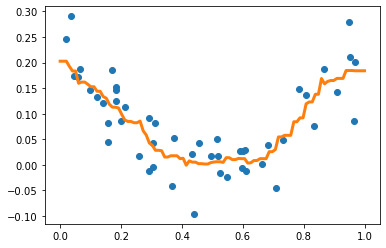

In [197]:
from matplotlib import pyplot as plt

np.random.seed(42)
X_tr = np.random.uniform(size=50)
y_tr = (X_tr - 0.5)**2 + 0.05*np.random.normal(size=50)

h=0.1
model = DistanceRegressor(h)
model.fit(X_tr, y_tr)

X_te = np.linspace(0, 1, 100)
y_pred = model.predict(X_te) # uncomment when you've implemented DistanceRegressor
plt.plot(X_tr, y_tr, 'o') 
plt.plot(X_te, y_pred, lw=3) # uncomment when you've implemented DistanceRegressor
plt.show()